#### Importamos librerias necesarias para iniciar el EDA (Exploratory Data Analysis).

##### En esta parte del proyecto donde desarrollaremos un modelo para recomendar 5 peliculas de acuerdo a una indicada, utilizaremos una serie de herramientas que nos ayudarán en el análisis y exploración de los datos: **seaborn**, **matplotlib**, **ydata-profiling**.



In [29]:
# Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from fastapi import FastAPI, HTTPException
import ydata_profiling
from wordcloud import WordCloud
from ydata_profiling import ProfileReport
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sqlalchemy import create_engine
import warnings
warnings.filterwarnings('ignore')

In [6]:
# Partimos del dataset resultante de la instancia anterior ETLy lo importamos.
archivo_parquet = 'C:\\Users\\felip\\Desktop\\Proyecto1\\Data\\df_movies.parquet'
df_movies = pd.read_parquet(archivo_parquet)
                            

In [4]:
# Examinar la información del DataFrame, como el tipo de datos y los valores nulos.
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49822 entries, 0 to 49821
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   belongs_to_collection  5169 non-null   object        
 1   budget                 49822 non-null  float64       
 2   genres                 49822 non-null  object        
 3   id                     49822 non-null  object        
 4   original_language      49807 non-null  object        
 5   overview               48819 non-null  object        
 6   popularity             49822 non-null  float64       
 7   production_companies   49822 non-null  object        
 8   production_countries   49822 non-null  object        
 9   release_date           45359 non-null  datetime64[ns]
 10  revenue                49822 non-null  float64       
 11  runtime                49562 non-null  float64       
 12  spoken_languages       49822 non-null  object        
 13  s

In [5]:
# Reducimos el dataframe para trabajar sobre nuestro modelo a aquellas peliculas con más de 200 votos.
df_movies_reduce = df_movies[df_movies['vote_count'] > 200]
df_movies_reduce.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4380 entries, 0 to 49536
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   belongs_to_collection  1320 non-null   object        
 1   budget                 4380 non-null   float64       
 2   genres                 4380 non-null   object        
 3   id                     4380 non-null   object        
 4   original_language      4380 non-null   object        
 5   overview               4375 non-null   object        
 6   popularity             4380 non-null   float64       
 7   production_companies   4380 non-null   object        
 8   production_countries   4380 non-null   object        
 9   release_date           4264 non-null   datetime64[ns]
 10  revenue                4380 non-null   float64       
 11  runtime                4380 non-null   float64       
 12  spoken_languages       4380 non-null   object        
 13  status 

In [6]:
df_movies_reduce.isnull().sum()

belongs_to_collection    3060
budget                      0
genres                      0
id                          0
original_language           0
overview                    5
popularity                  0
production_companies        0
production_countries        0
release_date              116
revenue                     0
runtime                     0
spoken_languages            0
status                      0
tagline                   396
title                       0
vote_average                0
vote_count                  0
return                      0
release_year                0
crewjob                     0
director                    0
actors                      0
dtype: int64

In [7]:
# Observar la cantidad de valores unicos de cada columna
df_movies_reduce.nunique()

belongs_to_collection     556
budget                    420
genres                   1088
id                       3969
original_language          26
overview                 3967
popularity               3970
production_companies     3302
production_countries      419
release_date             3507
revenue                  3338
runtime                   153
spoken_languages          518
status                      3
tagline                  3609
title                    3895
vote_average               55
vote_count               1619
return                   3379
release_year               93
crewjob                     1
director                 1830
actors                   3968
dtype: int64

#### Análisis de variables numéricas.

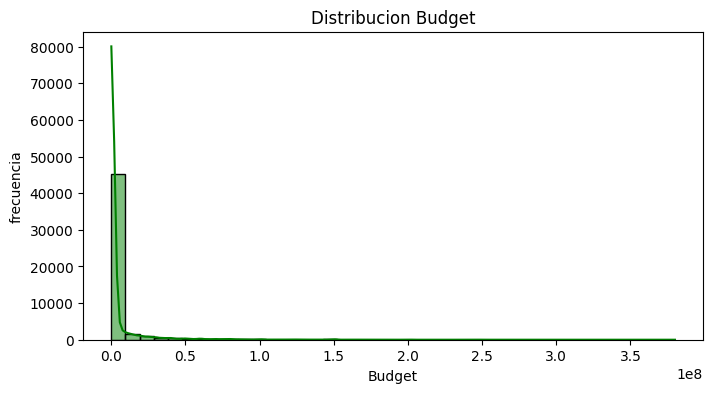

In [23]:
# Utilizamos Matploitlib para visualizar la frecuencia de los datos y la pendiente que representa.
plt.figure(figsize=(8, 4))
sns.histplot(df_movies['budget'], bins=40, kde=True, color='green')
plt.xlabel('Budget')
plt.ylabel('frecuencia')
plt.title('Distribucion Budget')
plt.show()

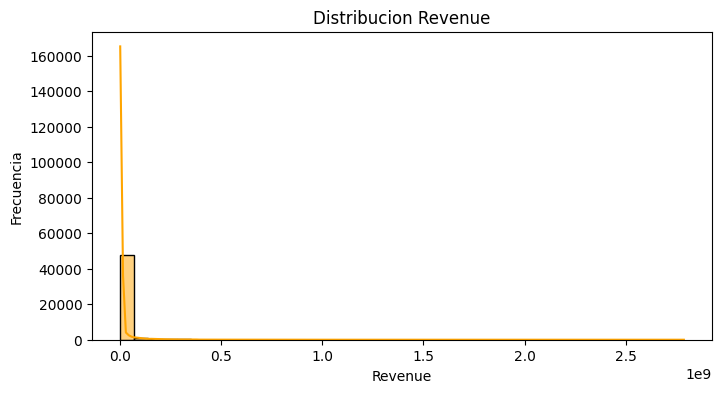

In [22]:
# Matploitlib para visualizar la frecuencia de los datos y la pendiente que representa.
plt.figure(figsize=(8, 4))
sns.histplot(df_movies['revenue'], bins=40, kde=True, color='orange')
plt.xlabel('Revenue')
plt.ylabel('Frecuencia')
plt.title('Distribucion Revenue')
plt.show()

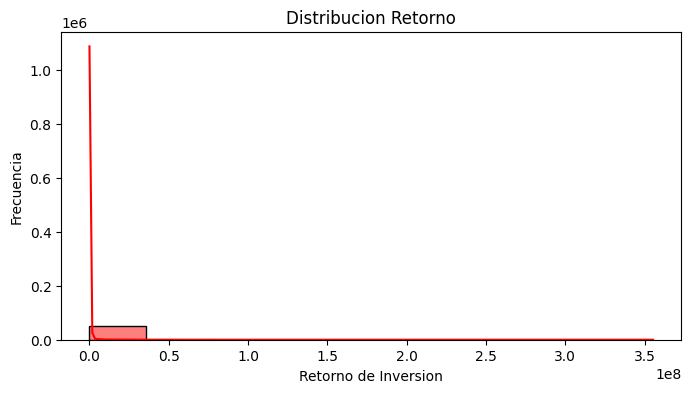

In [24]:
# Matploitlib para visualizar la frecuencia de los datos y la pendiente que representa.
plt.figure(figsize=(8, 4))
sns.histplot(df_movies['return'], bins=10, kde=True, color='red')
plt.xlabel('Retorno de Inversion')
plt.ylabel('Frecuencia')
plt.title('Distribucion Retorno')
plt.show()

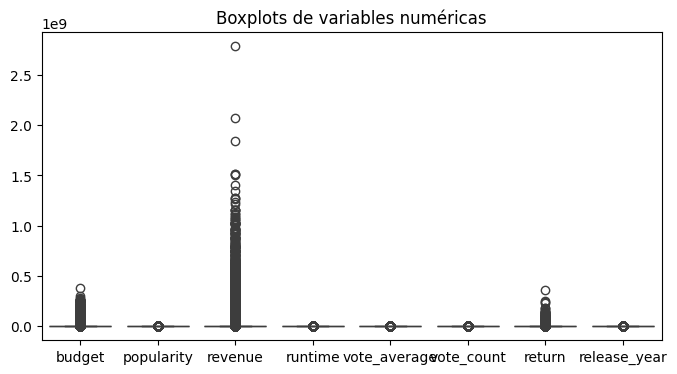

In [28]:
# Análizamos las variables numéricas a través de un boxplots para cada columna.

plt.figure(figsize=(8, 4))
sns.boxplot(data=df_movies, color='blue')
plt.title('Boxplots de variables numéricas')
plt.show()

#### Análisis de variables categóricas.

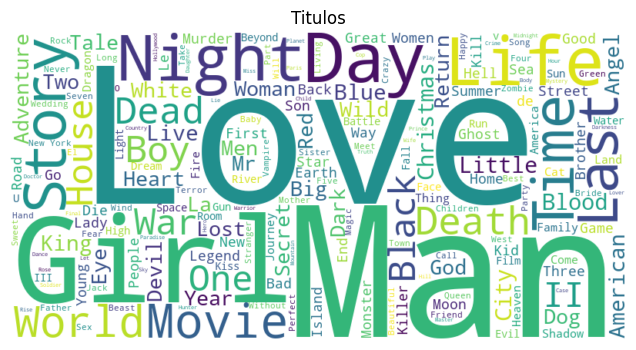

In [30]:
# ANALISIS DEL CAMPO TITLE

# Para poder procesar la data con wordcloud, debemos transformarla en cadena de texto.
text = ' '.join(df_movies['title'].tolist())

# procesamiento con wordcloud para poder graficarla
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Utilizamos Matplotlib para obtener una nube de palabras.
plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Titles')
plt.show()

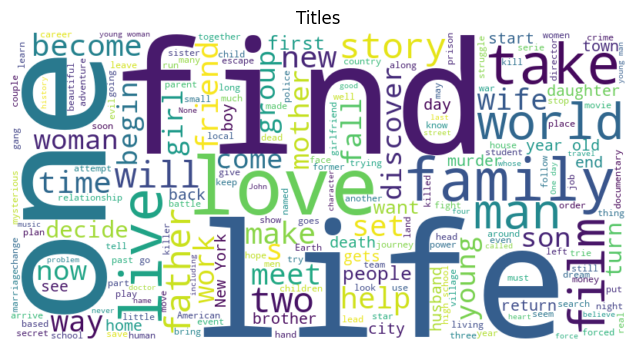

In [34]:
# ANALISIS DEL CAMPO OVERVIEW

# Para poder procesar la data con wordcloud, debemos transformarla en cadena de texto.
df_movies['overview'] = df_movies['overview'].astype(str)
text = ' '.join(df_movies['overview'].tolist())

# procesamiento con wordcloud para poder graficarla
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Utilizamos Matplotlib para obtener una nube de palabras.
plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Titles')
plt.show()

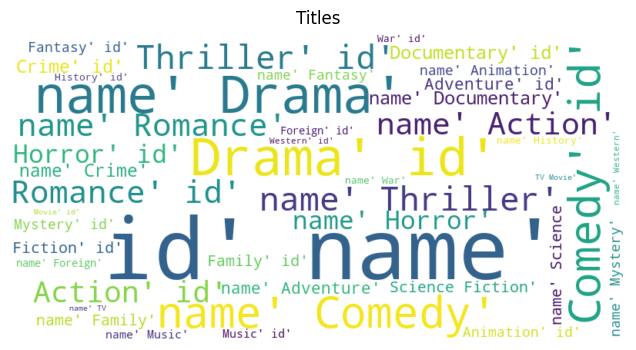

In [35]:
# ANALISIS DEL CAMPO GENRES

# Para poder procesar la data con wordcloud, debemos transformarla en cadena de texto.
text = ' '.join(df_movies['genres'].tolist())

# procesamiento con wordcloud para poder graficarla
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Utilizamos Matplotlib para obtener una nube de palabras.
plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Titles')
plt.show()

##### Del análisis previo de los datos, podemos determinar que de las columnas numéricas, la única que podría considerarse para definir el dataset final, sería la cantidad de votos. De esta forma, estaríamos concentrándonos en films de alta repercusión en el público. Es por ello, que nos centraremos en los films con más de 200 votos. Sólo se considerarán campos con cadenas de string para la búsqueda de similitudes.


##### Trabajos a realizar para lograr una recomendación basada en cadenas de strings:

#####  - Campo 'status': trabajar sólo con los registros 'released'.
#####  - Campo 'overview': Eliminar N/A.
#####  - Campo 'genres': desanidar para obtener sólo generos como una lista.
#####  - Campo 'production_companies': desanidar y obtener sólo el nombre de la compania productora.
#####  - Campo 'director', se agrupará en aquellos films con multiples directores.
#####  - Tampoco se consideran necesarios los siguientes campos: 'belongs_to_collection', 'budget', 'popularity', 'production_countries', 'release_date', 'revenue', 'runtime', 'spoken_languages', 'vote_average', 'vote_count', 'return', 'release_year', 'crewjob', 'tagline', ni el campo 'status' ya que se trabajará sólo con los films estrenados como se comentara previamente. 



In [36]:
# Seleccionamos sólo las peliculas con lanzamiento.
df_movies_released = df_movies_reduce[df_movies['status'] == 'Released']
df_movies_released.shape

(4378, 23)

In [37]:
# Elimina las filas con valores nulos en 'overview'
df_movies_released.dropna(axis=0, subset=['overview'], inplace=True)
df_movies_released.shape

(4373, 23)

In [38]:
# Seleccionar columnas mas relevantes
df_user = df_movies_released[['id','genres','original_language','overview','production_companies','title', 'director', 'actors']]
df_user.shape

(4373, 8)

In [40]:
# Separammos el campo 'director' para poder reagruparlo en una celda por films, para evitar repetición de registros en aquellos casos de películas con más de un director.
df_director = df_user[['id', 'director']]
df_director.info

<bound method DataFrame.info of            id         director
0         862    John Lasseter
1        8844     Joe Johnston
5         949     Michael Mann
9         710  Martin Campbell
11      12110       Mel Brooks
...       ...              ...
49252  269795      Paul Currie
49313  353491    Nikolaj Arcel
49459  378236  Anthony Leondis
49496  339692  Ric Roman Waugh
49536  417870   Malcolm D. Lee

[4373 rows x 2 columns]>

In [41]:
# Reagrupamos el dataframe para obtener sólo un id con una lista de directores
df_director_reagrupado = df_director.groupby('id')['director'].apply(list).reset_index()
df_director_reagrupado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3965 entries, 0 to 3964
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3965 non-null   object
 1   director  3965 non-null   object
dtypes: object(2)
memory usage: 62.1+ KB


In [44]:
# Unimos la nueva columna con el dataset principal.
df_user_dir = df_user.merge(df_director_reagrupado, on='id', how='left')

In [45]:
# Eliminamos antigua columna director.
df_user_dir.drop(columns=['director_x'], inplace=True)

In [46]:
# Renombramos la nueva columna.
df_user_dir.rename(columns={'director_y': 'directors'}, inplace=True)
df_user_dir


,id,genres,original_language,overview,production_companies,title,actors,directors
0,862,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",en,"Led by Woody, Andy's toys live happily in his ...","[{'name': 'Pixar Animation Studios', 'id': 3}]",Toy Story,"['Tom Hanks', 'Tim Allen', 'Don Rickles', 'Jim...",[John Lasseter]
1,8844,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",en,When siblings Judy and Peter discover an encha...,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...",Jumanji,"['Robin Williams', 'Jonathan Hyde', 'Kirsten D...",[Joe Johnston]
2,949,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",en,"Obsessive master thief, Neil McCauley leads a ...","[{'name': 'Regency Enterprises', 'id': 508}, {...",Heat,"['Al Pacino', 'Robert De Niro', 'Val Kilmer', ...",[Michael Mann]
3,710,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",en,James Bond must unmask the mysterious head of ...,"[{'name': 'United Artists', 'id': 60}, {'name'...",GoldenEye,"['Pierce Brosnan', 'Sean Bean', 'Izabella Scor...",[Martin Campbell]
4,12110,"[{'id': 35, 'name': 'Comedy'}, {'id': 27, 'nam...",en,When a lawyer shows up at the vampire's doorst...,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...",Dracula: Dead and Loving It,"['Leslie Nielsen', 'Mel Brooks', 'Amy Yasbeck'...",[Mel Brooks]
...,...,...,...,...,...,...,...,...
4368,269795,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",en,A man's life is derailed when an ominous patte...,"[{'name': 'Pandemonium', 'id': 8915}, {'name':...",2:22,"['Michiel Huisman', 'Teresa Palmer', 'Sam Reid...",[Paul Currie]
4369,353491,"[{'id': 28, 'name': 'Action'}, {'id': 37, 'nam...",en,"The last Gunslinger, Roland Deschain, has been...","[{'name': 'Imagine Entertainment', 'id': 23}, ...",The Dark Tower,"['Idris Elba', 'Matthew McConaughey', 'Tom Tay...",[Nikolaj Arcel]
4370,378236,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",en,"Gene, a multi-expressional emoji, sets out on ...","[{'name': 'Columbia Pictures', 'id': 5}, {'nam...",The Emoji Movie,"['T.J. Miller', 'James Corden', 'Anna Faris', ...",[Anthony Leondis]
4371,339692,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",en,A newly-released prison gangster is forced by ...,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...",Shot Caller,"['Nikolaj Coster-Waldau', 'Jon Bernthal', 'Lak...",[Ric Roman Waugh]


In [47]:
# Ahora sí, eliminamos duplicados
df_user_dir.drop_duplicates(subset=['overview'], inplace=True)  #df = df.drop_duplicates(subset=['nombre_columna'])
df_user_dir.dropna()
df_user_dir.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3965 entries, 0 to 4372
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    3965 non-null   object
 1   genres                3965 non-null   object
 2   original_language     3965 non-null   object
 3   overview              3965 non-null   object
 4   production_companies  3965 non-null   object
 5   title                 3965 non-null   object
 6   actors                3965 non-null   object
 7   directors             3965 non-null   object
dtypes: object(8)
memory usage: 278.8+ KB


#### Limpiaremos las columnas de género y compañias productoras.

In [48]:
# Expandimos las columnas 'genres' y 'production_companies' para limpiar la informacion innecesaria

def expandcolumns(df, columns):
    for column in columns:
        df[column] = df[column].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else []) #Convierte el contenido de cada celda en la columna column de df de una cadena de texto que representa una lista de diccionarios a una lista de diccionarios Python, utilizando ast.literal_eval. Si el valor es nulo (pd.notnull(x)), se devuelve una lista vacía.
        # Expande la columna column en filas, de modo que cada elemento de la lista de diccionarios se convierte en una fila separada en df
        df = df.explode(column)
        # Normaliza la columna column después de expandirla, lo que significa que convierte cada diccionario dentro de la lista en una serie de columnas.
        col_df = pd.json_normalize(df[column])
        # Renombra las columnas normalizadas agregando el nombre original de la columna como prefijo, para evitar conflictos si hay nombres de columnas duplicados en diferentes listas de diccionarios.
        col_df = col_df.add_prefix(f'{column}')
        # Elimina la columna original column del DataFrame df y la reemplaza con las columnas normalizadas (col_df), asegurándose de que el índice del DataFrame se reinicie para evitar problemas con el índice de las filas.
        df = df.drop(columns=[column]).reset_index(drop=True).join(col_df)
    return df

columns_to_expand = ['genres']
columns_to_expand2 = ['production_companies']

#Expandir las columnas de listas de diccionarios
df_genres = expandcolumns(df_user_dir, columns_to_expand)
df_companies = expandcolumns(df_user_dir, columns_to_expand2)

In [49]:
# Seleccionamos sólo las columnas genresname y id
df_genres = df_genres[['id', 'genresname']]
df_genres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10541 entries, 0 to 10540
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          10541 non-null  object
 1   genresname  10540 non-null  object
dtypes: object(2)
memory usage: 164.8+ KB


In [50]:
# Seleccionamos sólo las columnas genresname y id
df_companies = df_companies[['id', 'production_companiesname']]
df_companies.info()
                            

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13466 entries, 0 to 13465
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        13466 non-null  object
 1   production_companiesname  13459 non-null  object
dtypes: object(2)
memory usage: 210.5+ KB


In [51]:
# Reagrupamos el dataframe para obtener sólo un id con una lista de generos
df_genres_reagrupado = df_genres.groupby('id')['genresname'].apply(list).reset_index()
df_genres_reagrupado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3965 entries, 0 to 3964
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          3965 non-null   object
 1   genresname  3965 non-null   object
dtypes: object(2)
memory usage: 62.1+ KB


In [52]:
# Reagrupamos el dataframe productoras para obtener sólo un id con una lista de producton companies.
df_companies_reagrupado = df_companies.groupby('id')['production_companiesname'].apply(list).reset_index()
df_companies_reagrupado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3965 entries, 0 to 3964
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        3965 non-null   object
 1   production_companiesname  3965 non-null   object
dtypes: object(2)
memory usage: 62.1+ KB


In [53]:
# Unimos al dataset principal y eliminamos antigua columna.
df_user_dir = df_user_dir.merge(df_genres_reagrupado, on='id', how='left')
df_user_dir.drop(columns=['genres'], inplace=True)

In [54]:
# Unimos la nueva columna 'production_companies', borramos la anterior en un nuevo dataset final.
df_recommend = df_user_dir.merge(df_companies_reagrupado, on='id', how='left')
df_recommend.drop(columns=['production_companies'], inplace=True)

In [55]:
# Renombramos columnas
df_recommend.rename(columns={'genresname': 'genres', 'production_companiesname': 'production_companies'}, inplace=True)

In [56]:
# Transformamos la columna title a cadena de texto.
df_recommend['title'] = df_recommend['title'].astype(str)


In [28]:
# Exportamos el dataset definitivo
df_recommend.to_parquet('C:\\Users\\felip\\Desktop\\Proyecto1\\Data\\df_recommend.parquet')

#### Visualizamos cómo quedan los campos de género y compañía productoras, una vez trabajados

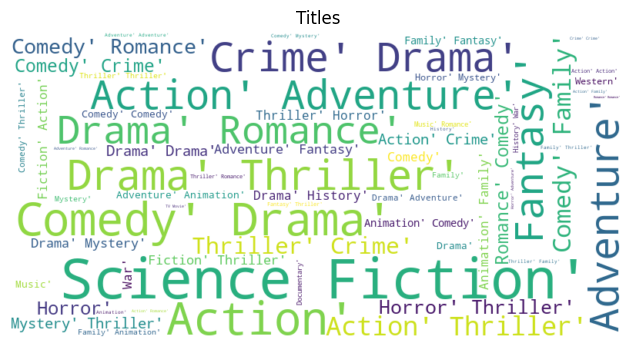

In [59]:
# NUEVO ANALISIS DEL CAMPO GENRES

# Para poder procesar la data con wordcloud, debemos transformarla en cadena de texto.
df_recommend['genres'] = df_recommend['genres'].astype(str)
text = ' '.join(df_recommend['genres'].tolist())

# procesamiento con wordcloud para poder graficarla
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Utilizamos Matplotlib para obtener una nube de palabras.
plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Titles')
plt.show()

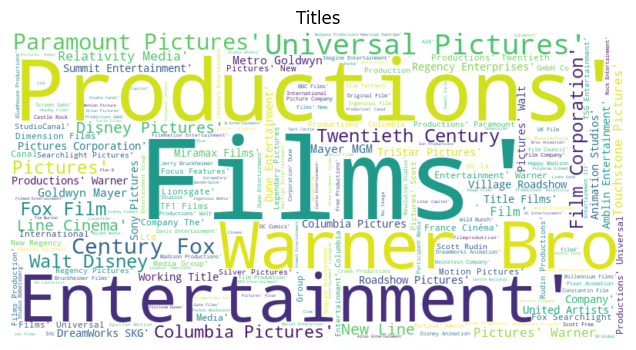

In [60]:
# NUEVO ANALISIS DEL CAMPO PRODUCTION COMPANIES

# Para poder procesar la data con wordcloud, debemos transformarla en cadena de texto.
df_recommend['production_companies'] = df_recommend['production_companies'].astype(str)
text = ' '.join(df_recommend['production_companies'].tolist())

# procesamiento con wordcloud para poder graficarla
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Utilizamos Matplotlib para obtener una nube de palabras.
plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Titles')
plt.show()

#### Modelado

In [34]:
# Utilzamos el modelo de SIMILITUD DEL COSENO
# Convertimos columnaS a una representacón numérica usando Tf-IDF
vectorizer = TfidfVectorizer()
matrix = vectorizer.fit_transform(df_recommend['title'] + ' ' + df_recommend['genres'].astype(str) + ' ' + df_recommend['actors'].astype(str) + ' ' + df_recommend['production_companies'].astype(str) + ' ' + df_recommend['directors'].astype(str) + ' ' + df_recommend['genres'].astype(str) + ' ' + df_recommend['genres'].astype(str))



In [35]:
# Reindexamos el dataframe
df_recommend = df_recommend.reset_index(drop=True)

# Calculamos la matriz de similitud de coseno
cosine_matrix = cosine_similarity(matrix)


In [48]:

def recomendacion(titulo: str):
    # Se convierte el título a minúsculas mediante la función lower().
    titulo = titulo.lower()
    # Se busca la película con el título convertido en minúsculas en el DataFrame y el resultado se almacena en el dataFrame siguiente:
    titulo_pelicula = df_recommend[df_recommend['title'].str.lower() == titulo]

    if titulo_pelicula.empty: # verifica si el DataFrame está vacío.
        # Si está vacío, se genera una excepción HTTPException con el código de estado 404 y un mensaje de error indicando que la película no se encontró.
        raise HTTPException(status_code=404, detail=f"No se encontró la película {titulo}")

    indice_producto = titulo_pelicula.index[0] # Se obtiene el índice de la película en el DataFrame df_recommend utilizando la propiedad index[0]
    similitudes_producto = cosine_matrix[indice_producto] # Se calcula la similitud del coseno entre la película y todas las demás películas.
    indices_top_5_similares = np.argsort(-similitudes_producto)[1:6] # Se ordenan los índices de las películas en orden descendente, excluyendo el titulo original.
    top_5_peliculas = df_recommend.loc[indices_top_5_similares, 'title'].tolist()  # Se obtienen los títulos de las 5 películas más similares utilizando
    return print(f"Películas similares a {titulo.capitalize()} son:{top_5_peliculas}")

In [54]:
# Ejemplo de uso
pelicula_recomendada = "toy story"
recomendacion(pelicula_recomendada)

Películas similares a Toy story son:['Toy Story 2', 'Toy Story 3', 'Toy Story of Terror!', 'Toy Story That Time Forgot', 'Bambi']
